# Fitting and forecasting data

In our last notebook we looked at fitting the hare-lynx population data with a Fourier series comprising multple sin functions. In this notebook we look at the balance between fitting data and creating a model for the data that has some predictive power.

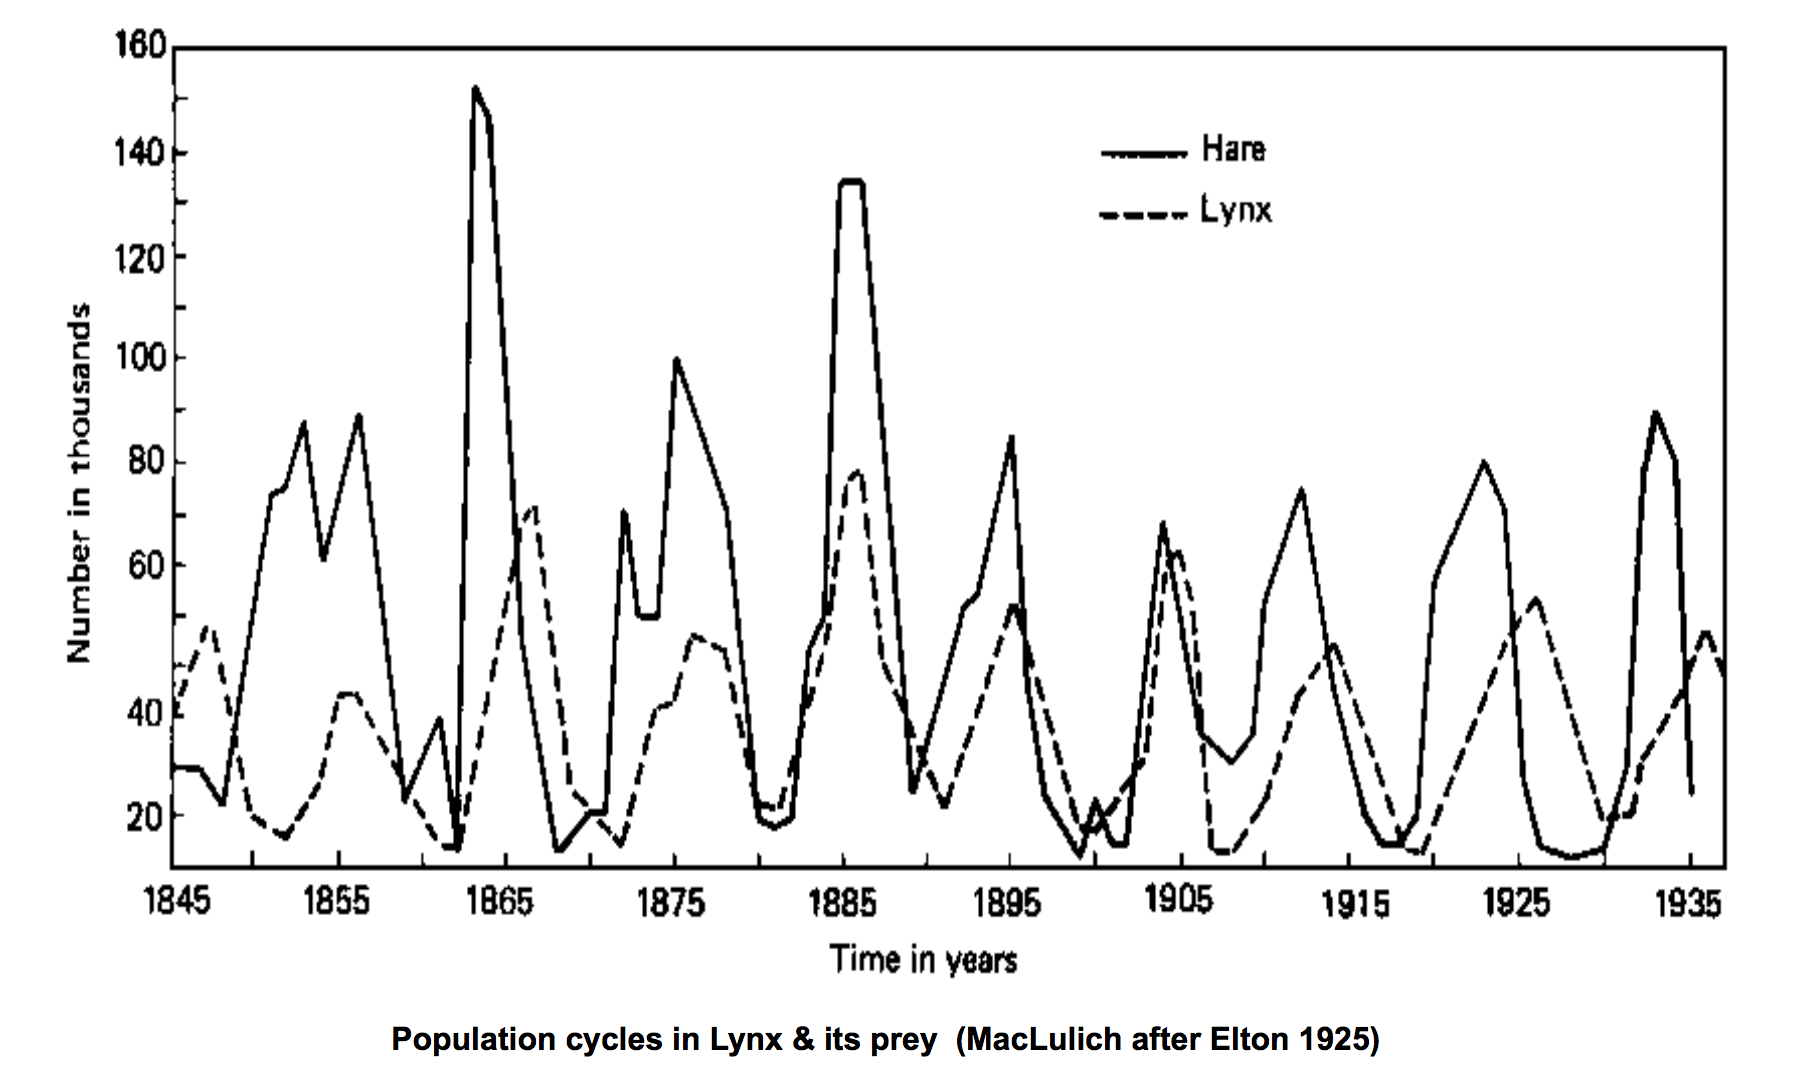

We already have a csv file with the data from 1847-1903 so let's load this, remind ourselves of the final values and estimate the hare and lynx population for the period from 1903 onwards:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("hare_lynx.csv", index_col=[0])
data.tail(5)

,year,hare,lynx
52,1899,2,6
53,1900,15,10
54,1901,2,21
55,1902,6,35
56,1903,45,50


<AxesSubplot:xlabel='year'>

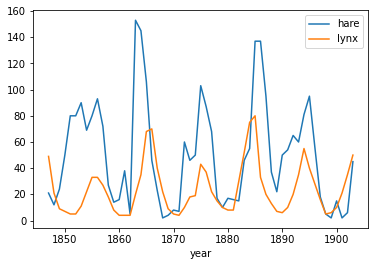

In [5]:
data.plot(x="year", y=["hare", "lynx"])

C:\Users\jc1420\AppData\Local\Temp\ipykernel_8132\154171838.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = data.append(new_data, ignore_index=True)


<AxesSubplot:xlabel='year'>

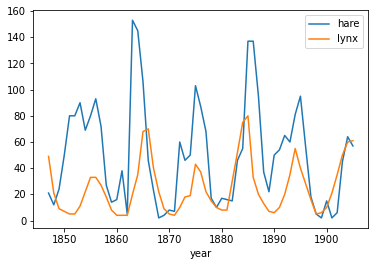

In [7]:
new_data = pd.DataFrame([[1904, 64, 60],[1905, 57, 61]], columns=data.columns)
all_data = data.append(new_data, ignore_index=True)
all_data.plot(x="year", y=["hare", "lynx"])

## Exercise
1. Estimate from the graph the data for the rest of the period and amend new_data accordingly.
2. What do you notice about the data after 1903 compared to before? What can you find out about how this data was collected?

## Overfitting
With enough parameters and the right functions, we can approximate any time series to any degree of accuracy. In practice, we need also to consider the predictive power of our model. There is a balance to be struck between modelling past data accurately and predicting future behaviour accurately. One way to attempt to mitigate the risks of overfitting is to fit the model to some of the data and reforecast the remaining data. For example, we might fit the model only for the years 1847-1885, produce a reforecast for the period 1886-1903, and then compare that reforecast with the actual data for that period.

Using the parameters I chose before, this would give:

In [8]:
a = 40
b = 30
c = 0.5
d = 1850
data["hare estimate"] = a + b*np.sin(c*data["year"] + d)
fit_period = 1885-1847
forecast_period = 1903-1886
N = len(data["year"])
error_fit = (1/N)*np.sum((data["hare"][:fit_period]-data["hare estimate"][:fit_period])**2)
print("The mean squared error for the fitting period is: ", error_fit)
error_forecast = (1/N)*np.sum((data["hare"][forecast_period+1:]-data["hare estimate"][forecast_period+1:])**2)
print("The mean squared error for the forecast period is: ", error_forecast)

The mean squared error for the fitting period is:  1944.472958684521
The mean squared error for the forecast period is:  1388.8509721523733


## Exercise

1. Tweak your Fourier series model to get a good balance between fitting for the period 1847-1885 and producing a good forecast for 1886-1903.
2. How small can you get the error for the fit and how does this affect the error for the forecast?
3. Use this technique to produce a model and reforecast for the data to 1935.